# Introduction to Data Science Project

## YOUTUBE, WHAT MAKES A VIDEO VIRAL?

### What is YOUTUBE?

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. 
YouTube is a free video sharing website that makes it easy to watch online videos. You can even create and upload your own videos to share with others.

### DATA SET DESCRIPTION:

Our data set is picked from Kaggle.

It has data from the last 5-6 years confined to regions of United States of America.

It is a categorical dataset meaning, it had classified data, in categories such as Entertainment, music etc.

#### AIM:
The aim of the project is to analyze what makes a video viral on Youtube. Will be playing with various attributes of the dataset and will answer many questions which will eventually lead us to answer our main question.
Will be Creating many visualizations to better understand the results.
Performed the following tasks:

1)Exploratory Data Analysis.

2)Data Cleaning.

3)Sentiment Analysis

To answer questions like:

1) How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other?


2) How are they connected?


3) What are the most common words in trending video titles?


4) Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?


5) When were trending videos published? On which days of the week? at which times of the day?

### Analysis:

We have imported the JSON library because it can parse JSON from strings or files.

The library parses JSON into a Python dictionary or list. It can also convert Python dictionaries or lists into JSON strings.

A Counter is a dict subclass for counting hashable objects. It is an unordered collection where elements are stored as dictionary keys and their counts are stored as dictionary values. Counts are allowed to be any integer value including zero or negative counts. The Counter class is similar to bags or multisets in other languages.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt 
import warnings 
from collections import Counter
import datetime
import json
import time
warnings.filterwarnings('ignore')

The data set will be read using pd.read_csv. USvideos contains data on videos featured in the trending section of the YouTube US domain.

In [3]:
# Importing US Youtube Video dataset
df_usa=pd.read_csv("C:/Users/sawan/OneDrive/Desktop/Rutgers Courses/IDS_Shafto/youtube-a/USvideos.csv")


Using the below code, we have found out information of all the variables in the dataset.

In [4]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In the below code we have used 'Describe' which gives us some statistical information about the varibles which makes it easy for us to analyze.

In [5]:
df_usa.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


# Most common words in video titles

Let us see if there are some words that are used significantly in trending video titles. Using the below code we have displayed the 25 most common words in all trending video titles. We found this using the 'Title' variable of our dataset.

In [50]:
title_words = list(df_usa["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

### Cleaning the data:
The data we obtain is not always ideal for analysis. It has to be made uniform in a way that it helps us obtain relevant and important information.
Most of the times, a lot of values in the dataset are missing.
These missing values have to be filled so that it gets easy to code about it.
In the below codes, we have cleaned the data and added some data to make it uniform.

In [6]:
#The description column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by NaN
df_usa[df_usa["description"].apply(lambda x: pd.isna(x))].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


In [7]:
#To get rid of NULL Values we put an empty string in Description column
df_usa["description"] = df_usa["description"].fillna(value="")

In [8]:
#In the dataset, the Trending Date and Published Time are not in the Unix date-time format. Let's fix this first.
df_usa['trending_date'] = pd.to_datetime(df_usa['trending_date'], format='%y.%d.%m')
df_usa['publish_time'] = pd.to_datetime(df_usa['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# separates date and time into two columns from 'publish_time' column

df_usa.insert(4, 'publish_date', df_usa['publish_time'].dt.date)
df_usa['publish_time'] = df_usa['publish_time'].dt.time
df_usa['publish_date']=pd.to_datetime(df_usa['publish_date'])

### Categorization of Data:
Here we have found out the relationship that exists between 2 variables i.e Category ID and the number of videos uploaded in that category. This mapping made it easier for us to visualize the data to find which category is You Tube viewed the most for.

Text(0,0.5,'Count')

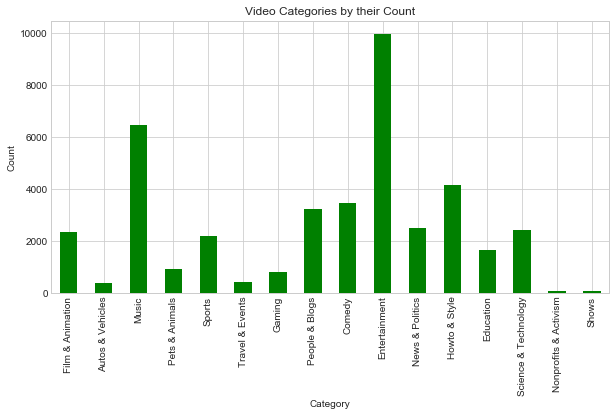

In [88]:
cat_id_mapping = {2:'Autos & Vehicles',1:'Film & Animation',
                  10:'Music',15:'Pets & Animals',17:'Sports', 
                  19:'Travel & Events',20:'Gaming',22:'People & Blogs', 
                  23:'Comedy',24:'Entertainment',25:'News & Politics',
                  26:'Howto & Style',27:'Education',28:'Science & Technology',
                  29:'Nonprofits & Activism',43:'Shows'} 
df_usa_gb = df_usa.groupby('category_id').count()['title'] 
df_usa_gb = df_usa_gb.rename(cat_id_mapping) 
ax = df_usa_gb.plot(kind='bar',title='Video Categories by their Count',color='green',figsize
=(10,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')

#### RESULT: 
From the above visualization we can see the ranking of categories that You Tube is viewed for:

1) Entertainment

2) Music

3) Howto and Style

In our dataset, there were multiple rows for a particular video. To calculate the total views, total comments and total likes, dislikes of the video, we grouped them by mapping them to a video ID.
The below script will give you the total no. of views/comments/likes, and dislikes of a video.

In [7]:
usa_video_views=df_usa.groupby(['video_id'])['views'].agg('sum')
usa_video_likes=df_usa.groupby(['video_id'])['likes'].agg('sum')
usa_video_dislikes=df_usa.groupby(['video_id'])['dislikes'].agg('sum')
usa_video_comment_count=df_usa.groupby(['video_id'])['comment_count'].agg('sum')


To get the numbers of videos on which the 'Comments Disabled/ Rating Disabled/Video Error'. We need to remove the duplicates to get the correct numbers otherwise there will be redundancy.

In [10]:
df_usa_single_day_trend=df_usa.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_usa_multiple_day_trend= df_usa.drop_duplicates(subset='video_id',keep='first',inplace=False)

frames = [df_usa_single_day_trend, df_usa_multiple_day_trend]
df_usa_without_duplicates=pd.concat(frames)

df_usa_comment_disabled=df_usa_without_duplicates[df_usa_without_duplicates['comments_disabled']==True].describe()
df_usa_rating_disabled=df_usa_without_duplicates[df_usa_without_duplicates['ratings_disabled']==True].describe()
df_usa_video_error=df_usa_without_duplicates[df_usa_without_duplicates['video_error_or_removed']==True].describe()

In [11]:
#Video trend on single day
df_usa_single_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,2017-11-13,17,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,2017-11-12,1,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,2017-11-12,25,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10,24,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,2017-11-10,28,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


In [10]:
df_usa_multiple_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...



### Which video was trending for maximum number of days:
Using the below code we found out the top 5 videos that were trending for the longest on You Tube.

Text(0.5,1,'Top 5 Videos that trended maximum days in USA')

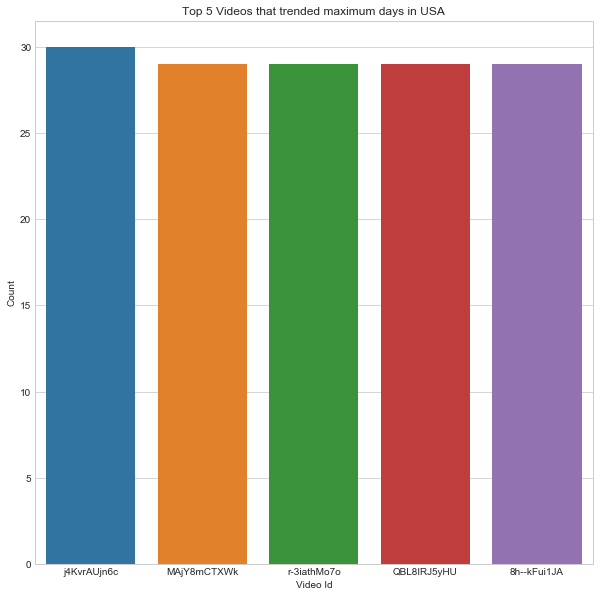

In [11]:
df_usa_which_video_trended_maximum_days=df_usa.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_which_video_trended_maximum_days['video_id'],y=df_usa_which_video_trended_maximum_days['trending_date'], data=df_usa_which_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in USA")

Here the result we have obtained is for video ID 'sXP6vliZIHI'.

### Details of the trending video:
Now let us find out the other details of this trending video.
That is the likes, dislikes, comments and views.

In [12]:
df_usa_maximum_views=usa_video_views['sXP6vliZIHI']
df_usa_maximum_likes=usa_video_likes['sXP6vliZIHI']
df_usa_maximum_dislikes=usa_video_dislikes['sXP6vliZIHI']
df_usa_maximum_comment=usa_video_comment_count['sXP6vliZIHI']

Now, let us analyze how long it took for the videos to become the most trending videos on the platform.
The below code will display how long it took for the top 5 videos to trend.

C:\Users\sawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Maximum no of days taken by 5 videos to be popular in USA')

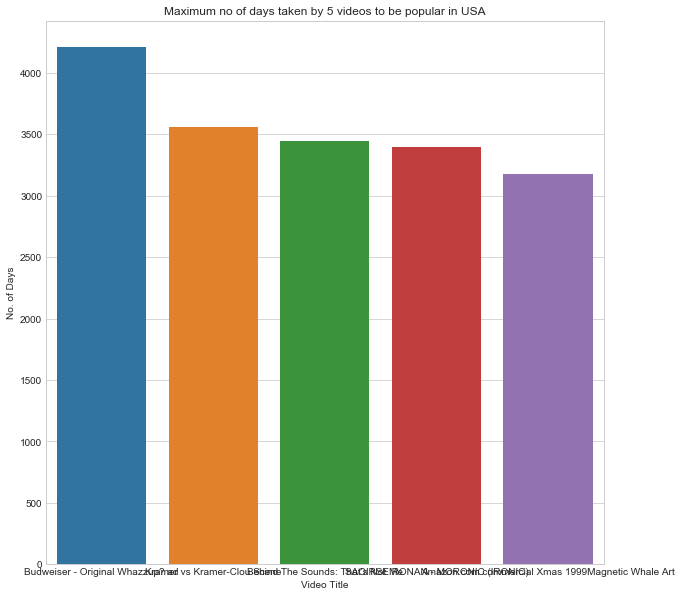

In [14]:
df_usa_multiple_day_trend['Days_taken_to_be_trending_video'] =df_usa_multiple_day_trend['trending_date'] - df_usa_multiple_day_trend['publish_date']
df_usa_multiple_day_trend['Days_taken_to_be_trending_video']= df_usa_multiple_day_trend['Days_taken_to_be_trending_video'] / np.timedelta64(1, 'D')
usa_no_of_days_take_trend=df_usa_multiple_day_trend.sort_values(by='Days_taken_to_be_trending_video',ascending=False).head(5)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=usa_no_of_days_take_trend['title'],y=usa_no_of_days_take_trend['Days_taken_to_be_trending_video'], data=usa_no_of_days_take_trend)
plt.xlabel("Video Title")
plt.ylabel("No. of Days")
plt.title("Maximum no of days taken by 5 videos to be popular in USA")

### Result:
It has taken more than 10 years, for some videos to trend. The video_id MJO3FmmFuh4 taken maximum 4215 days to be called a Trending.

## Channel:
The channels on which the videos are posted also make an important attribute responsible to trend on the platform.
Let us by visualization, observe the top 5 channels of USA.

### Top 5 Channels of USA:

Text(0.5,1,'Top 5 Trending Channel in USA')

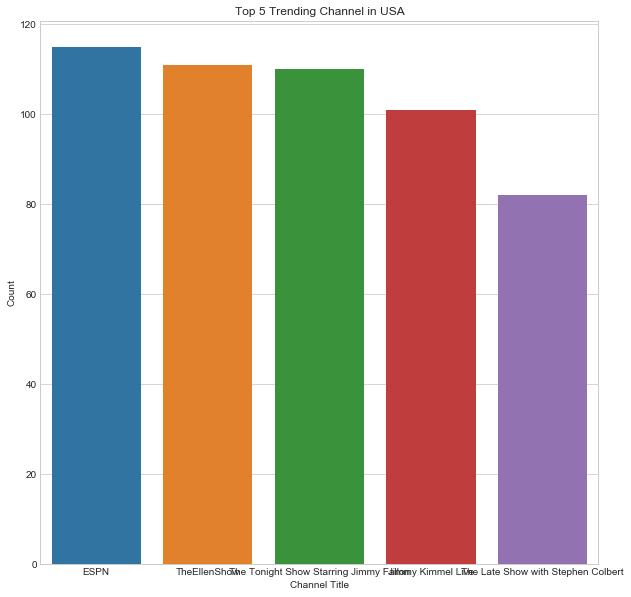

In [15]:
usa_trending_channel=df_usa_without_duplicates.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=usa_trending_channel['channel_title'],y=usa_trending_channel['video_id'], data=usa_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in USA")

### Result:
ESPN is the the top channel of USA.

Like we did before the video ID's, here we are mapping the categories to category ID using the below code:
But here we are doing it only for out top 5 channels.

Text(0.5,1,'Top 5 Category IDs for USA')

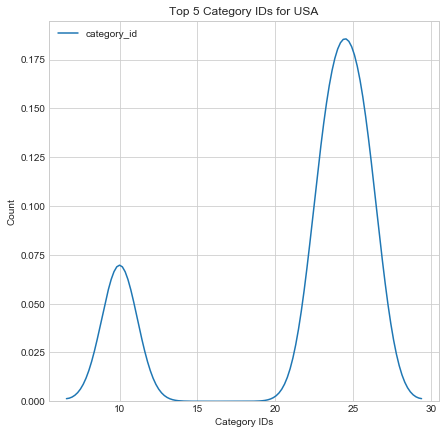

In [16]:
usa_category_id=df_usa_without_duplicates.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(usa_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for USA")

This graph shows that the maximum category_id is 24 and the Category_Ids are majorly between 22-27.

### Natural Language Processing (Sentimental Analysis):

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.
Natural Language Processing is a field of computer science that focuses on the interaction between computers and humans. NLP techniques are used to analyze text, providing a way for computers to understand human language. A few examples of NLP applications include automatic summarization, topic segmentation, and sentiment analysis.

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [13]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sawan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



To Count the frequency of words in Title column.

In [14]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df_usa['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [16]:
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
#nltk_words = list(stopwords.words('english'))   
stop_words.extend(stop_words)

In [17]:
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  

### Visualization for Frequency of words used in Title Variable:
The below code will show us how frequently certain words are used in the Titles of the videos.

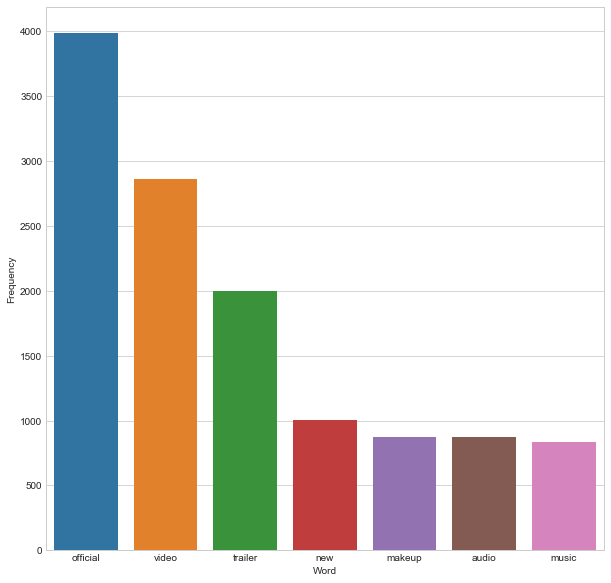

In [82]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

### Result:
We can conclude from the above representation of data that the word "Official" is used at the highest frequency.


We have used the below code to Categorize the description column into Positive and Negative sentiments using TextBlob.


Categorize the Title column into Positive and Negative sentiments using TextBlob

### Visualization to find the nature of Title:

We have used sentiment analysis to find the nature of titles i.e. to find the ploarity of the words in the title.
Here we have used 'Title' variable for plotting.

In [3]:
from textblob import TextBlob

bloblist_title = list()

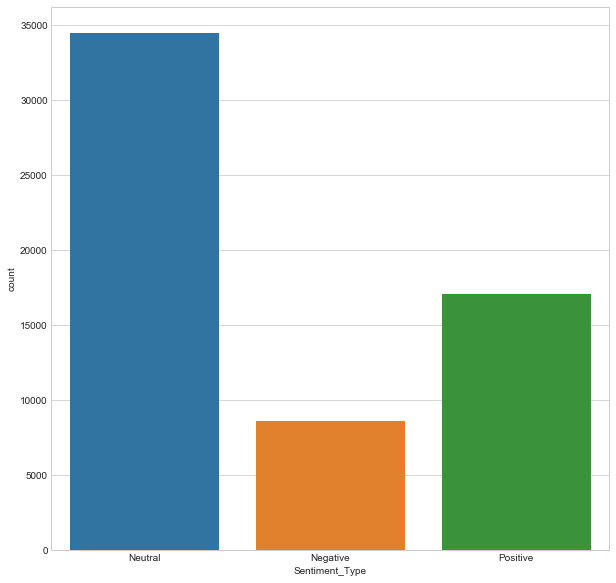

In [5]:
df_usa_title_str=df_usa['title']
for row in df_usa_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)



### Result :
Here we can see that the nature of maximum titles is Neutral for the videos, followed by positive and the negative.

Here we have tried finding how the length of title is related to the number of views a video receives.
We have tried finding if the length of the title matters for a video to get more number of views.

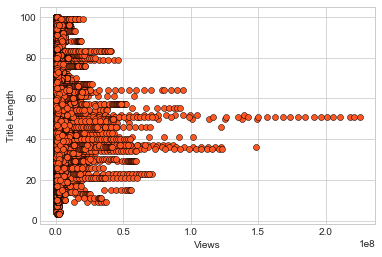

In [26]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
df_usa["title_length"] = df_usa["title"].apply(lambda x: len(x))
fig,ax= plt.subplots()
_ = ax.scatter(x=df_usa['views'], y=df_usa['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5) 
_ = ax.set(xlabel="Views", ylabel="Title Length")

### Result:
Here we can infer from the visualization that if the length of the title is too big or small, the number of views are less compared to the views received for a title of video with moderate number of words. Here the range for moderate words means, 40-50 words.

## Correlation between variables:
Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1denotes the highest negative correlation, and 0 denotes that there is no correlation.
In the below visualization we have tried finding how related the variables in the dataset are.

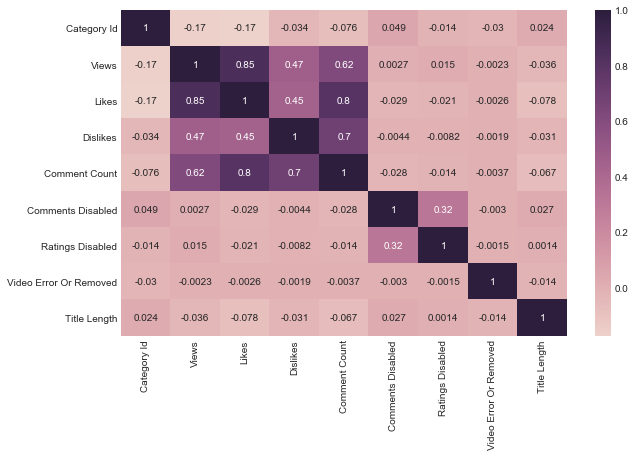

In [34]:
#The below code is written to display correlation between all the numerical and boolean variables
h_labels = [x.replace('_', ' ').title() for x in 
            list(df_usa.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_usa.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True),ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

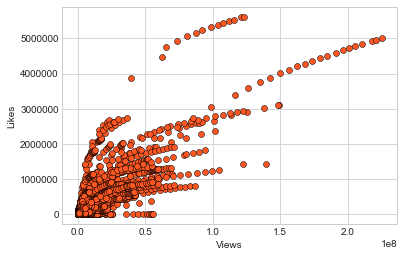

In [35]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df_usa['views'], y=df_usa['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5) 
_ = ax.set(xlabel="Views", ylabel="Likes")

Which channels have the largest number of trending videos?

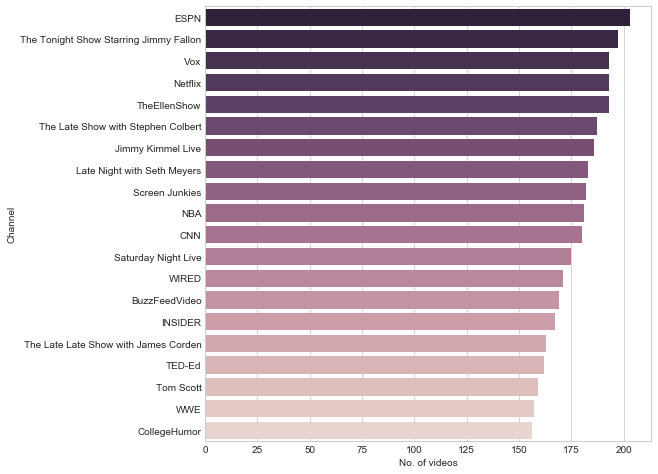

In [39]:
cdf = df_usa.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax) 
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## Trending videos and their publishing time:

An example value of the publish_time column in our dataset is 2017-11-13T17:13:01.000Z. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is 2017-11-13 and the time is 17:13:01 in Coordinated Universal Time (UTC) time zone.
Let's add two columns to represent the date and hour of publishing each video, then delete the original publish_timecolumn because we will not need it anymore

In [41]:
df_usa["publishing_day"] = df_usa["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a')) 
df_usa["publishing_hour"] = df_usa["publish_time"].apply(lambda x: x[11:13])
df_usa.drop(labels='publish_time', axis=1, inplace=True)

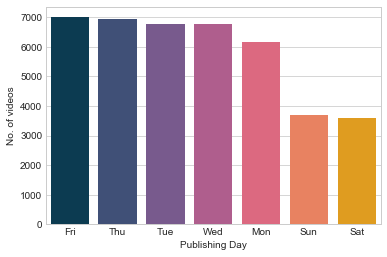

In [42]:
cdf = df_usa["publishing_day"].value_counts()\
    .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day":
"No_of_videos"}) 
fig, ax = plt.subplots() 
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax) 
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos

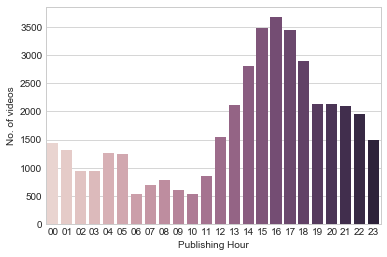

In [43]:
cdf = df_usa["publishing_hour"].value_counts().to_frame().reset_index()\
    .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"}) 
fig, ax = plt.subplots() 
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax) 
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We also notice that the period between 12AM and 1PM has the smallest number of trending videos.
But why is that? Is it because people publish a lot more videos between 2PM and 7PM?
Is it because how YouTube algorithm chooses trending videos?


Categorize the Tags column into Positive and Negative sentiments using TextBlob

Using Natural Language processing we diagnosed the nature of names of the videos.

Our results were categorized into; Negative, Positive and Neutral.

The result was:

The tags usually are of Positive sentiment type.

Then Neutral followed by Negative.

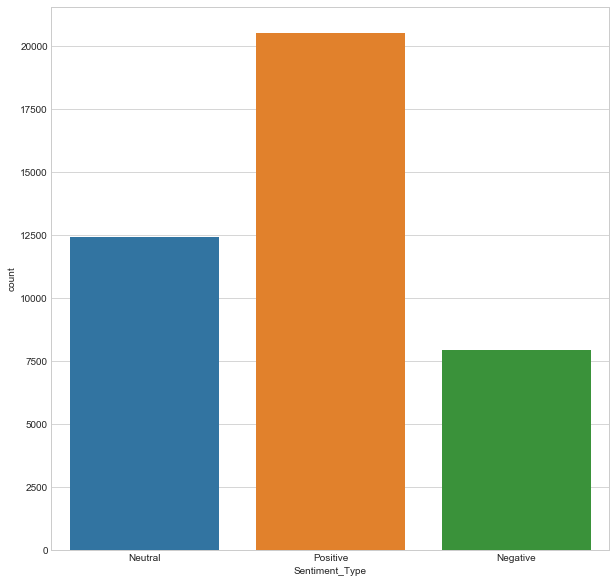

In [5]:
from textblob import TextBlob

bloblist_tags = list()

df_usa_tags_str=df_usa['tags']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

In [49]:
UScomments = pd.read_csv('C:/Users/sawan/OneDrive/Desktop/Rutgers Courses/IDS_Shafto/youtube-a/UScomments.csv')

In [50]:
#Using Textblob library to calculate sentiments
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [31]:
def pol2sent(pol):
    if pol<=-.5:
        return "Very negative"
    if pol>-.5 and pol<0:
        return "Negative"
    if pol == 0:
        return "Neutral"
    if pol > 0 and pol<0.5:
        return "Positive"
    if pol>=0.5:
        return "Very positive"
    

In [52]:
def grouped_weighted_avg(values, weights, by):
   return (values * weights).groupby(by).sum() / weights.groupby(by).sum()


In [58]:

us_videos_categories = pd.read_json('C:/Users/sawan/OneDrive/Desktop/Rutgers Courses/IDS_Shafto/youtube-a/US_category_id.json')

category
Autos & Vehicles          10432.942857
Comedy                    55074.786765
Education                 21522.155378
Entertainment             41579.927250
Film & Animation          53097.183801
Gaming                    67877.339806
Howto & Style             34758.220539
Music                    188078.699126
News & Politics            5974.597222
Nonprofits & Activism    170616.000000
People & Blogs            46478.597980
Pets & Animals            19076.942857
Science & Technology      26682.409449
Shows                     15435.250000
Sports                    28089.582589
Travel & Events            9946.542373
Name: likes, dtype: float64


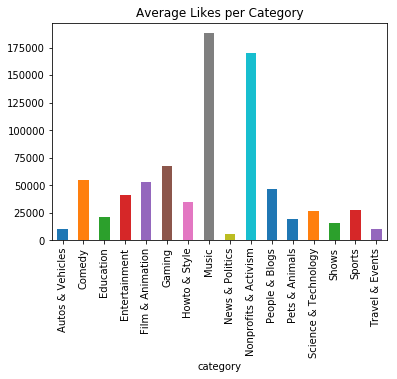

In [8]:
USVideo_Last = df_usa.sort_values('likes', ascending=False).drop_duplicates('video_id').sort_index()
USVideo_Last.groupby('category').likes.mean().plot(kind="bar")
print(USVideo_Last.groupby('category').likes.mean())
plt.title("Average Likes per Category")
plt.show()

We analyzed the number of likes received per category and then ranked them.

The result we obtained is:

1)Music

2)Entertainment

3)People and Blogs

category
Autos & Vehicles            730306
Comedy                    29960684
Education                  5402061
Entertainment             67442642
Film & Animation          17044196
Gaming                     6991366
Howto & Style             20646383
Music                    150651038
News & Politics            3011197
Nonprofits & Activism      2388624
People & Blogs            23006906
Pets & Animals             2670772
Science & Technology      10165998
Shows                        61741
Sports                    12584133
Travel & Events             586846
Name: likes, dtype: int64


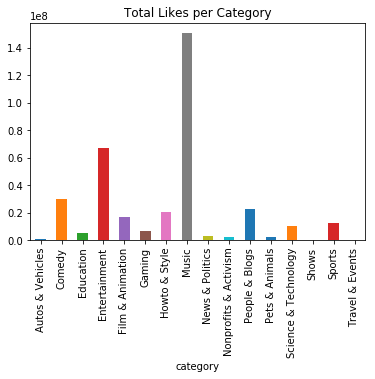

In [10]:
USVideo_Last.groupby('category').likes.sum().plot(kind="bar")
print(USVideo_Last.groupby('category').likes.sum())
plt.title("Total Likes per Category")
plt.show()

Views per Category:
We've ranked the categories as per their number of views.

The result is:

Music

Entertainment

People and blogs.

In [61]:
df_usa=df_usa.merge(Videosentiment, on="video_id")

In [43]:
categories = {int(category['id']): category['snippet']['title'] for category in us_videos_categories['items']}


In [46]:
df_usa.category_id = df_usa.category_id.astype('category')
df_usa['category'] = [categories[cid] for cid in df_usa.category_id]

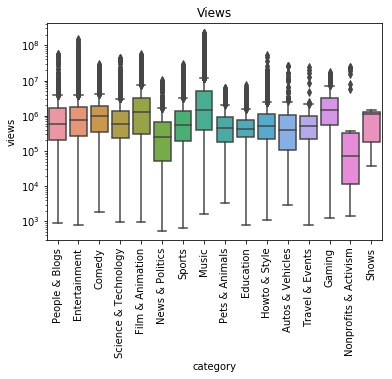

In [47]:
sns_ax = sns.boxplot(x='category',y='views',data=df_usa)
_, labels = plt.xticks()
_ = sns_ax.set_xticklabels(labels, rotation=90)
_ = sns_ax.set_title('Views')
_ = sns_ax.set(yscale="log")


## CONCLUSION

Hence after thorough analysis and many visualizations, we would like to conclude by mentioning the factors or characteristics that the most trending videos had, these factors can eventually be stated as the factors resposible for making a video viral on you tube:

1)Maximum Trending videos were posted on Friday.

2)Videos are posted on Fridays between 4pm to 5pm.

3)Most commonly used words in titles are: Official, Video and Trailer.

4)Length of the titles is usually between 40-60 words.

5)The channel that has the most number of trending videos is ESPN.

6)The most trending video, was trending for 1 month on youtube(Longest time of being viral).

7)The nature of the tags for trending videos was: Positve, Neutral and Negative.

8)The nature of names for trending videos was Neutal, Negative and Positive.

9)The category for which YOUTUBE is used the most is Music followed by Entertainment followed by People and Blogs.

10)From correlation we know that the highest correlation is between Likes and comments.

These are the inferences we have made from our analysis.


## REFERENCES:

https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/data

https://www.kaggle.com/sgonkaggle/exploring-youtube-trending-videos-insights-eda

https://www.quora.com/What-are-some-good-data-science-projectsfbclid=IwAR2qbCiiqO5i1oekWZR_pPNQaYGN9nrlrgbdPlEqUusLqoyo14dF2bWjQxw
